In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/My Drive/diabetes_data_upload.csv")

In [2]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.shape

(520, 17)

In [ ]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [ ]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
df["class"].unique()

array(['Positive', 'Negative'], dtype=object)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


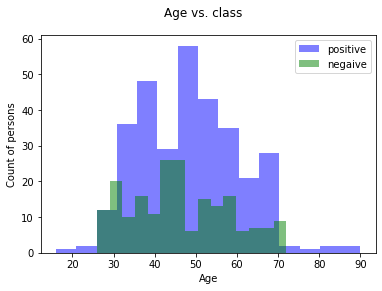

In [4]:
fig, ax = plt.subplots()

ax.hist(df[df["class"]=="Positive"]["Age"], bins=15, alpha=0.5, color="blue", label="positive")
ax.hist(df[df["class"]=="Negative"]["Age"], bins=15, alpha=0.5, color="green", label="negaive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of persons")

fig.suptitle("Age vs. class")

ax.legend();

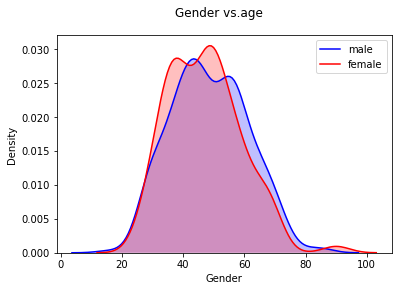

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Gender"]=="Male"]["Age"], shade=True, color="blue", label="male", ax=ax)
sns.kdeplot(df[df["Gender"]=="Female"]["Age"], shade=True, color="red", label="female", ax=ax)

ax.set_xlabel("Gender")
ax.set_ylabel("Density")

fig.suptitle("Gender vs.age");


Next, we’re going to encode the categorical data  so that they’re changed to numbers which can then be fed to the machine learning models

In [5]:
df_dummies = pd.get_dummies(df, columns = ['Gender', 'Polyuria', 'Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'], drop_first = True)

In [6]:
df_dummies.head(2)

,Age,class,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,Positive,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,Positive,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
cols = df_dummies.columns.tolist()

In [ ]:
cols

['Age',
 'class',
 'Gender_Male',
 'Polyuria_Yes',
 'Polydipsia_Yes',
 'sudden weight loss_Yes',
 'weakness_Yes',
 'Polyphagia_Yes',
 'Genital thrush_Yes',
 'visual blurring_Yes',
 'Itching_Yes',
 'Irritability_Yes',
 'delayed healing_Yes',
 'partial paresis_Yes',
 'muscle stiffness_Yes',
 'Alopecia_Yes',
 'Obesity_Yes']

In [8]:
df_dummies=df_dummies[['Age',
 'Gender_Male',
 'Polyuria_Yes',
 'Polydipsia_Yes',
 'sudden weight loss_Yes',
 'weakness_Yes',
 'Polyphagia_Yes',
 'Genital thrush_Yes',
 'visual blurring_Yes',
 'Itching_Yes',
 'Irritability_Yes',
 'delayed healing_Yes',
 'partial paresis_Yes',
 'muscle stiffness_Yes',
 'Alopecia_Yes',
 'Obesity_Yes',
 'class']]

In [9]:
df_dummies.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


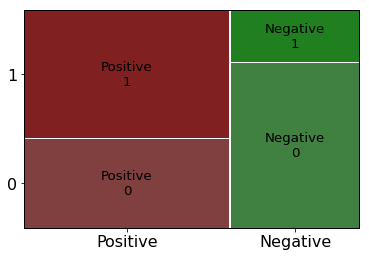

In [10]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df_dummies, ['class', 'Polyphagia_Yes']);

In [11]:
#we’ll create the dependent matrix (X) from the data set

X = df_dummies.iloc[:, :-1].values
print(X)

[[40  1  0 ...  1  1  1]
 [58  1  0 ...  0  1  0]
 [41  1  1 ...  1  1  0]
 ...
 [58  0  1 ...  1  0  1]
 [32  0  0 ...  0  1  0]
 [42  1  0 ...  0  0  0]]


In [12]:
#we’ll extract the dataset to get the dependent vector

y = df_dummies.iloc[:, -1].values
print(y)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Posit

Building the Model

In [14]:
#Importing the required libraries
from sklearn.model_selection import train_test_split

In [ ]:
X.shape

(520, 16)

In [ ]:
y.shape

(520,)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [23]:
x_train.shape

(364, 16)

In [24]:
y_train.shape

(364,)

Predictions by Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
print(y_predict)

['Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Posit

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score

In [ ]:
accuracy_score(y_test,y_predict)

0.9358974358974359